In [92]:
! pip install -U python-jobspy

In [ ]:
import csv
from jobspy import scrape_jobs

jobs = scrape_jobs(
#     site_name=["indeed", "linkedin", "zip_recruiter", "glassdoor"],
    site_name=["linkedin"],
    search_term="IT",
    job_type="internship",
    location="france",
    results_wanted=1000,
    hours_old=72, # (only Linkedin/Indeed is hour specific, others round up to days old)
    country_indeed='france',  # only needed for indeed / glassdoor

    linkedin_fetch_description=True # get full description and direct job url for linkedin (slower)
    # proxies=["208.195.175.46:65095", "208.195.175.45:65095", "localhost"],

)

jobs['is_remote'].fillna(0, inplace=True)
print(f"Found {len(jobs)} jobs")
cvs_jobs=jobs.to_csv("csv_FIles/jobs.csv", quoting=csv.QUOTE_NONNUMERIC, escapechar="\\", index=False) # to_excel

: 

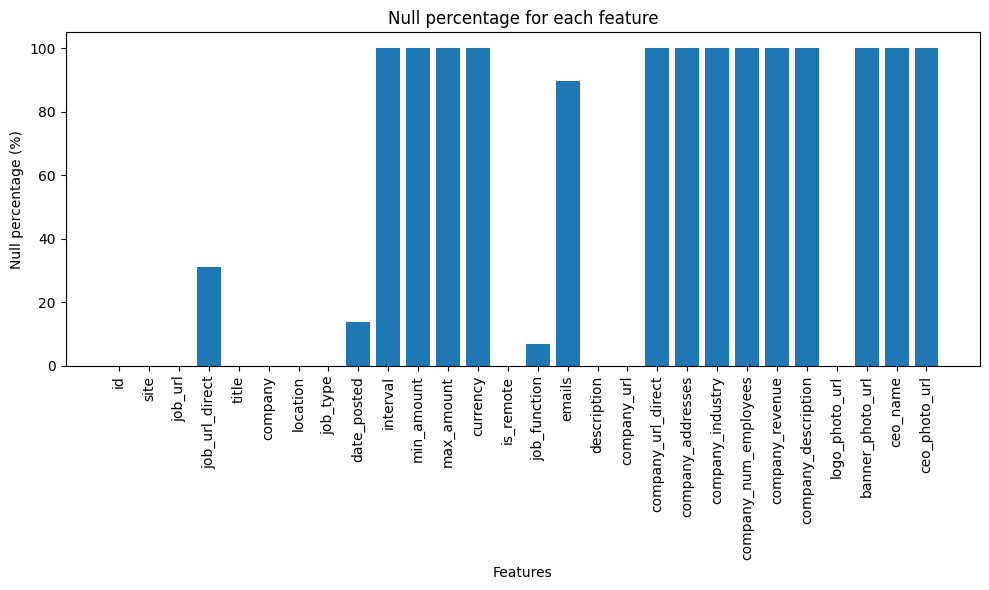

In [95]:
import matplotlib.pyplot as plt

null_percentages = {}
for feature in jobs:
    null_count = jobs[feature].isnull().sum()
    null_percent = (null_count / jobs.shape[0]) * 100
    null_percentages[feature] = null_percent

plt.figure(figsize=(10, 6))
plt.bar(null_percentages.keys(), null_percentages.values())
plt.xlabel('Features')
plt.ylabel('Null percentage (%)')
plt.title('Null percentage for each feature')
plt.xticks(rotation=90)  # rotate x-axis labels for better readability
plt.tight_layout()
plt.savefig('null_percentages.png')
plt.show()


In [96]:
# prompt: select from dataframe job id location title job_url  description and put it into anothor dataframe

selected_columns = ['id', 'location', 'title', 'job_url', 'is_remote' , 'description']
selected_jobs = jobs[selected_columns]

In [97]:
selected_jobs

C:\Users\hachichaMed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\formatters.py:344: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,id,location,title,job_url,is_remote,description
0,3967643024,"Bordeaux, Nouvelle-Aquitaine, France",Ingénieur(e) d'Affaires IT,https://www.linkedin.com/jobs/view/3967643024,0,***L'Entreprise :***\n\n\n\n\n\n Le groupe ACE...
3,3965494621,"Maisons-Alfort, Île-de-France, France",Un(e) ingénieur(e) informatique en contrat d’a...,https://www.linkedin.com/jobs/view/3965494621,0,"**Entreprise**\n Créée le 1er janvier 1997, l'..."
5,3968132095,"Paris, Île-de-France, France",Stagiaire Business Analyst (H/F),https://www.linkedin.com/jobs/view/3968132095,0,Découvrez le métier de Business Analyst à l'oc...
6,3967674310,"Issy-les-Moulineaux, Île-de-France, France",Chargé de communication en alternance (H/F),https://www.linkedin.com/jobs/view/3967674310,0,**Présentation de Pluraskills :** \n\n\n\n\n\n...
8,3967856150,"Andrézieux-Bouthéon, Auvergne-Rhône-Alpes, France",Supply Chain – SIOP (Sales Inventory Operation...,https://www.linkedin.com/jobs/view/3967856150,0,Rattaché au responsable SIOP/ demand planning ...
11,3967859569,"Issy-les-Moulineaux, Île-de-France, France",Alternance - Business Analyst H/F/X - YVES ROCHER,https://www.linkedin.com/jobs/view/3967859569,0,Description du poste :\n \n**A pourvoir dès ja...
12,3965492525,"Villeurbanne, Auvergne-Rhône-Alpes, France",ASSISTANT CAMPAIGN MANAGER B2B ALTERNANCE H/F,https://www.linkedin.com/jobs/view/3965492525,0,**Entreprise**\n « Nous sommes persuadés que l...
13,3965425016,"Pantin, Île-de-France, France",STAGE – Investment Analytics and Data services...,https://www.linkedin.com/jobs/view/3965425016,0,**STAGE – Investment Analytics and Data servic...
14,3968594021,"Paris, Île-de-France, France",Content Manager - German Speaker (apprenticesh...,https://www.linkedin.com/jobs/view/3968594021,0,"**The product we are building**\n At Yousign, ..."
15,3967627076,"Nantes, Pays de la Loire, France",Alternance Ingénieur.e Cybersécurité Nantes,https://www.linkedin.com/jobs/view/3967627076,0,**A la recherche d’une alternance de 12 mois à...


In [98]:
# prompt: if there is a row with description feature Nan delete the row

selected_jobs = selected_jobs.dropna(subset=['description'])


In [99]:
selected_jobs

C:\Users\hachichaMed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\formatters.py:344: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,id,location,title,job_url,is_remote,description
0,3967643024,"Bordeaux, Nouvelle-Aquitaine, France",Ingénieur(e) d'Affaires IT,https://www.linkedin.com/jobs/view/3967643024,0,***L'Entreprise :***\n\n\n\n\n\n Le groupe ACE...
3,3965494621,"Maisons-Alfort, Île-de-France, France",Un(e) ingénieur(e) informatique en contrat d’a...,https://www.linkedin.com/jobs/view/3965494621,0,"**Entreprise**\n Créée le 1er janvier 1997, l'..."
5,3968132095,"Paris, Île-de-France, France",Stagiaire Business Analyst (H/F),https://www.linkedin.com/jobs/view/3968132095,0,Découvrez le métier de Business Analyst à l'oc...
6,3967674310,"Issy-les-Moulineaux, Île-de-France, France",Chargé de communication en alternance (H/F),https://www.linkedin.com/jobs/view/3967674310,0,**Présentation de Pluraskills :** \n\n\n\n\n\n...
8,3967856150,"Andrézieux-Bouthéon, Auvergne-Rhône-Alpes, France",Supply Chain – SIOP (Sales Inventory Operation...,https://www.linkedin.com/jobs/view/3967856150,0,Rattaché au responsable SIOP/ demand planning ...
11,3967859569,"Issy-les-Moulineaux, Île-de-France, France",Alternance - Business Analyst H/F/X - YVES ROCHER,https://www.linkedin.com/jobs/view/3967859569,0,Description du poste :\n \n**A pourvoir dès ja...
12,3965492525,"Villeurbanne, Auvergne-Rhône-Alpes, France",ASSISTANT CAMPAIGN MANAGER B2B ALTERNANCE H/F,https://www.linkedin.com/jobs/view/3965492525,0,**Entreprise**\n « Nous sommes persuadés que l...
13,3965425016,"Pantin, Île-de-France, France",STAGE – Investment Analytics and Data services...,https://www.linkedin.com/jobs/view/3965425016,0,**STAGE – Investment Analytics and Data servic...
14,3968594021,"Paris, Île-de-France, France",Content Manager - German Speaker (apprenticesh...,https://www.linkedin.com/jobs/view/3968594021,0,"**The product we are building**\n At Yousign, ..."
15,3967627076,"Nantes, Pays de la Loire, France",Alternance Ingénieur.e Cybersécurité Nantes,https://www.linkedin.com/jobs/view/3967627076,0,**A la recherche d’une alternance de 12 mois à...


In [100]:
for feature in selected_columns:
    null_percentages = selected_jobs[feature].isnull().sum() * 100 / selected_jobs.shape[0]
    print(null_percentages, "the feature is :", feature)

0.0 the feature is : id
0.0 the feature is : location
0.0 the feature is : title
0.0 the feature is : job_url
0.0 the feature is : is_remote
0.0 the feature is : description


In [101]:
cvs_jobs=selected_jobs.to_csv("csv_FIles/jobs.csv", quoting=csv.QUOTE_NONNUMERIC, escapechar="\\", index=False) # to_excel

Average number of words: 546.6896551724138


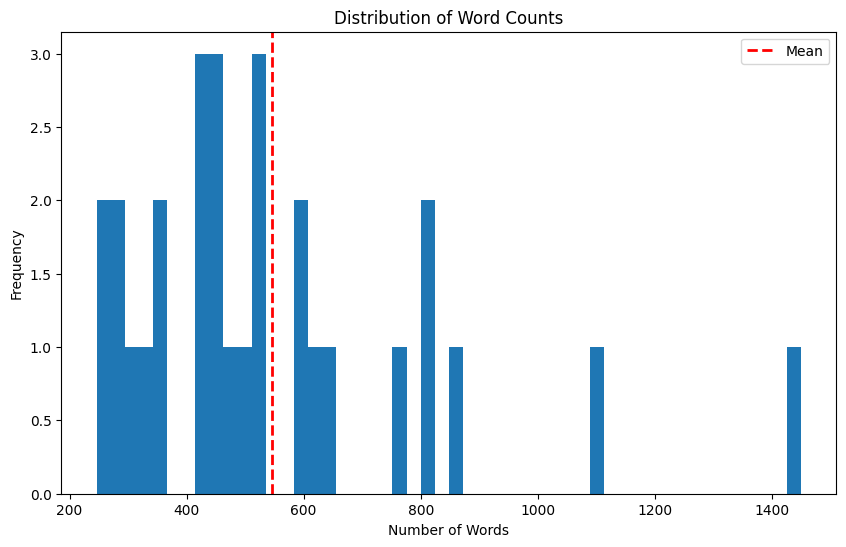

In [102]:
import matplotlib.pyplot as plt
import numpy as np

word_counts = jobs['description'].apply(lambda x: len(x.split()))
average_word_count = np.mean(word_counts)
print("Average number of words:", average_word_count)



plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=50)
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Distribution of Word Counts')
plt.axvline(x=average_word_count, color='r', linestyle='dashed', linewidth=2, label='Mean')
plt.legend()
plt.savefig('word_count_distribution.png')
plt.show()




In [103]:
jobs.to_csv("csv_FIles/jobs.csv", quoting=csv.QUOTE_NONNUMERIC, escapechar="\\", index=False) # to_excel

In [104]:
import csv

with open('csv_FIles/jobs.csv', 'r', newline='', encoding='utf-8') as csvfile_in:
    reader = csv.reader(csvfile_in)
    with open('csv_FIles/jobs_cleaned.csv', 'w', newline='', encoding='utf-8') as csvfile_out:
        writer = csv.writer(csvfile_out)
        for row in reader:
            new_row = [cell.replace('\n', ' ') for cell in row]
            writer.writerow(new_row)


In [105]:
import pandas as pd

jobs_df = pd.read_csv("csv_FIles/jobs_cleaned.csv")


Average number of words: 546.6896551724138


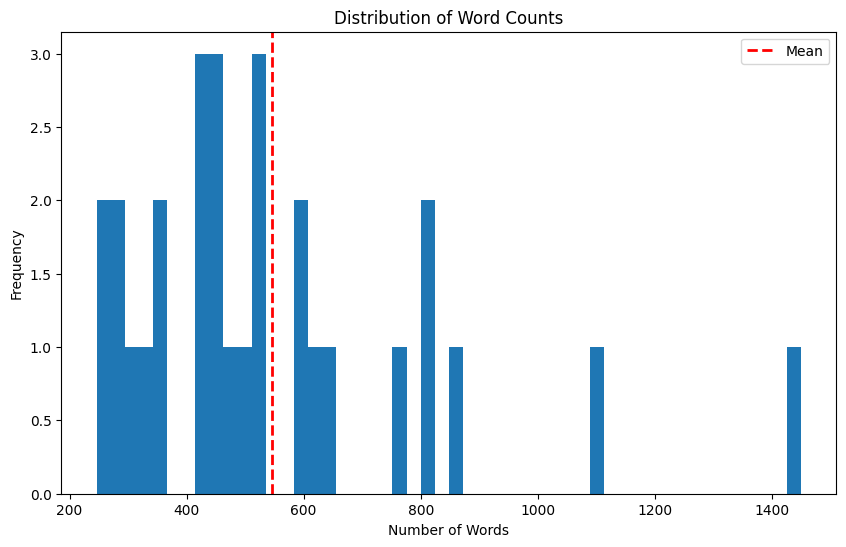

In [106]:
import matplotlib.pyplot as plt
import numpy as np

word_counts = jobs_df['description'].apply(lambda x: len(x.split()))
average_word_count = np.mean(word_counts)
print("Average number of words:", average_word_count)


plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=50)
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Distribution of Word Counts')
plt.axvline(x=average_word_count, color='r', linestyle='dashed', linewidth=2, label='Mean')
plt.legend()
plt.savefig('word_count_distribution.png')
plt.show()